# Zomato Data Analysis Project

## Step 1: Importing libraries

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



## Step 2: Create the dataframe

In [222]:
df = pd.read_csv("C:\\Users\\ASUS\\Downloads\\Zomato data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


## Converting the datatype of colummn - rate

In [225]:
def handlerate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value);
df['rate'] = df['rate'].apply(handlerate)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


## Checking data accuracy

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Questions

## 1) What type of restaurant do the majority of customers order from?

Text(0.5, 1.0, 'Type of Restaurent')

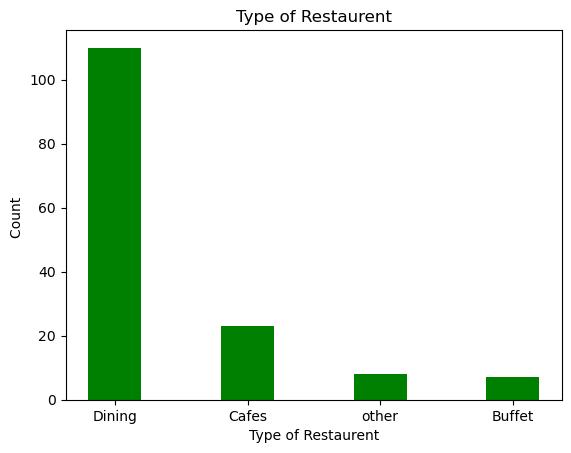

In [232]:
count_data = df['listed_in(type)'].value_counts()

x = count_data.index
y = count_data.values
plt.bar(x,y , color = 'green',  width = 0.4)
plt.xlabel('Type of Restaurent')
plt.ylabel('Count ')
plt.title('Type of Restaurent')

#### Conclusion : Majority of customers order from Dining type of restaurent

## 2) How many votes has each type of restaurant received from customers?

Text(0.5, 1.0, 'Votes v/s Restaurent type')

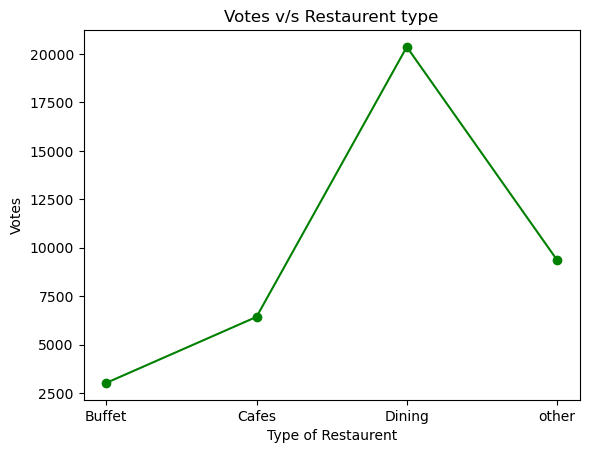

In [236]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
results = pd.DataFrame({'votes' : grouped_data})
plt.plot(results, color = 'green', marker = "o")
plt.xlabel('Type of Restaurent')
plt.ylabel('Votes')
plt.title('Votes v/s Restaurent type')

 ####  Conclusion: Dining restaurent has recieved maximum votes

## 3) What are the ratings that the majority of restaurants have received?

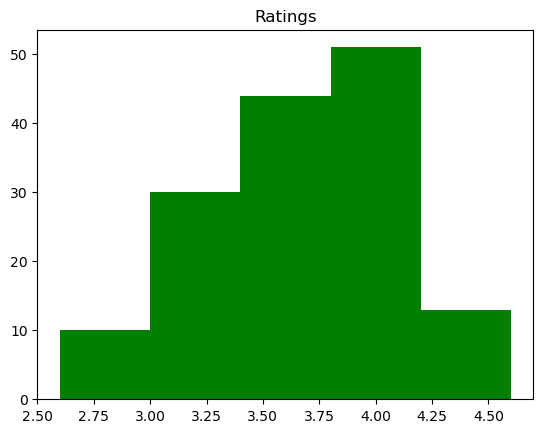

In [240]:
plt.hist(df['rate'],bins = 5, color = 'green')
plt.title('Ratings')
plt.show()


####   Conclusion : Most people have given ratings between 3.75 and 4.25

## 4)Zomato has observed that most couples order most of their food online. What is their
## average spending on each order?

Text(0.5, 1.0, 'Type of Restaurent')

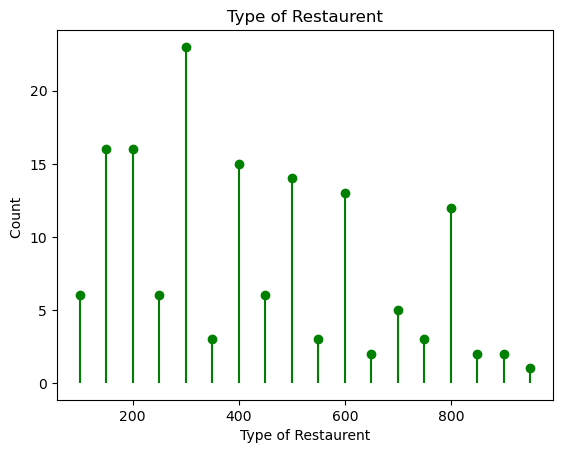

In [244]:
couple_data = df['approx_cost(for two people)'].value_counts()

x = couple_data.index
y = couple_data.values
plt.stem(x,y ,basefmt = " " , linefmt = 'g' )
plt.xlabel('Type of Restaurent')
plt.ylabel('Count ')
plt.title('Type of Restaurent')

#### Conclusion : The majority of couples prefer the restaurent of approximate cost of 300 rupees.

## 5) Which type of restaurant received more offline orders, so that Zomato can provide those
## customers with some good offers?

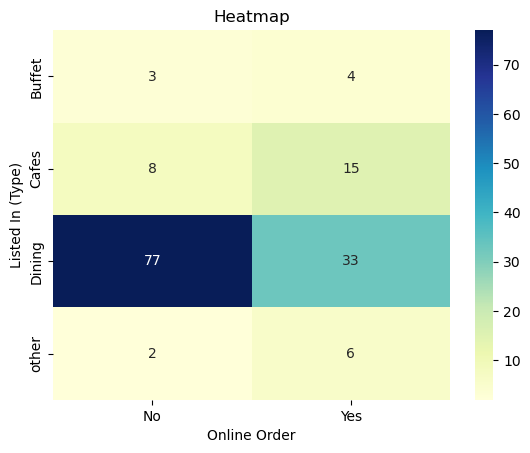

In [257]:
pivot_table = df.pivot_table(index='listed_in(type)' , columns  = 'online_order',  aggfunc = 'size' , fill_value = 0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

#### Conclusion: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.